                                EN3160 Assignment 1 on Intensity Transformations and Neighborhood
                                                        Filtering

INDEX NO : 200556L                                                                          
NAME : S.M.R.K.SAMARAKOON

Question 1

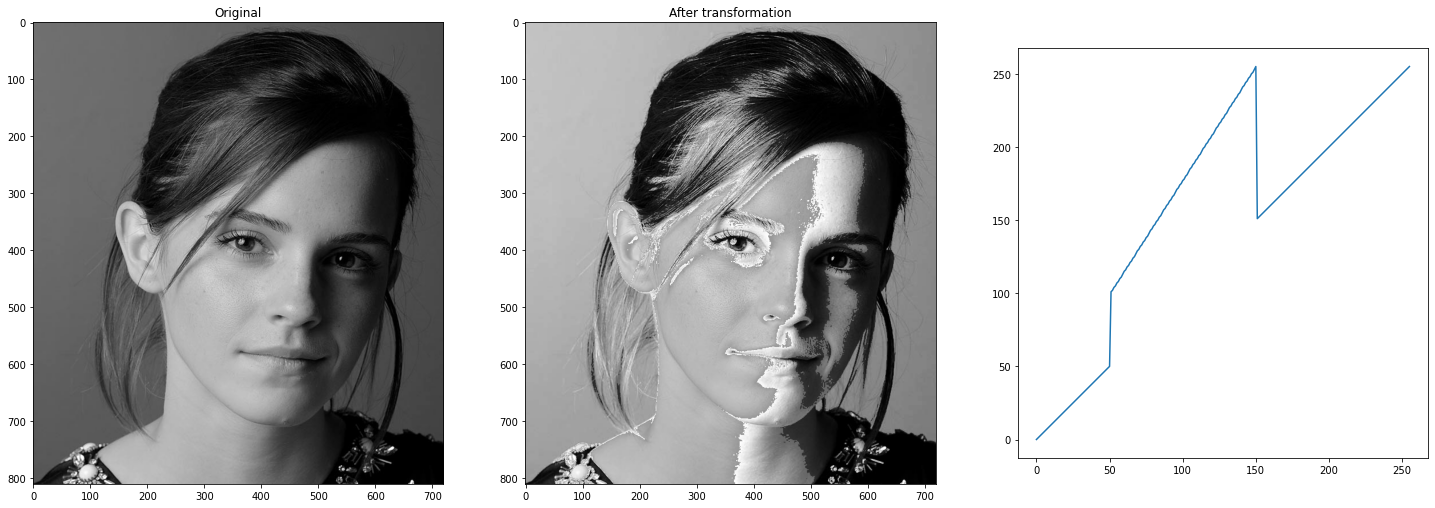

In [2]:
# Intensity Windowing

import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

#Load original image
img_orig = cv.imread('images/emma.jpg', cv.IMREAD_GRAYSCALE)
assert img_orig is not None

c = np.array([(50, 50),(50,100),(150,255),(150,150)])

t1 = np.linspace(0, c[0,1], c[0,0] + 1 - 0).astype('uint8')
t2 = np.linspace(c[1,1] + 1, c[2,1], c[2,0] - c[1,0]).astype('uint8')
t3 = np.linspace(c[3,1] + 1, 255, 255 - c[3,0]).astype('uint8')
transform = np.concatenate((t1, t2, t3), axis=0).astype('uint8')

# Apply the transformation and display the transformed image
image_transformed = cv.LUT(img_orig, transform)


assert len(transform)==256
image_original = cv.cvtColor(img_orig, cv.COLOR_BGR2RGB)
image_trans = cv.cvtColor(image_transformed, cv.COLOR_BGR2RGB)

# Plot the original and transformed image
fig, ax = plt.subplots(1,3, figsize = (25,25))
ax[0].imshow(image_original)
ax[1].imshow(image_trans)
ax[0].set_title('Original')
ax[1].set_title('After transformation')
ax[2].plot(transform)
ax[2].set_aspect('equal')
plt.show()





Question 2


(a) White matter

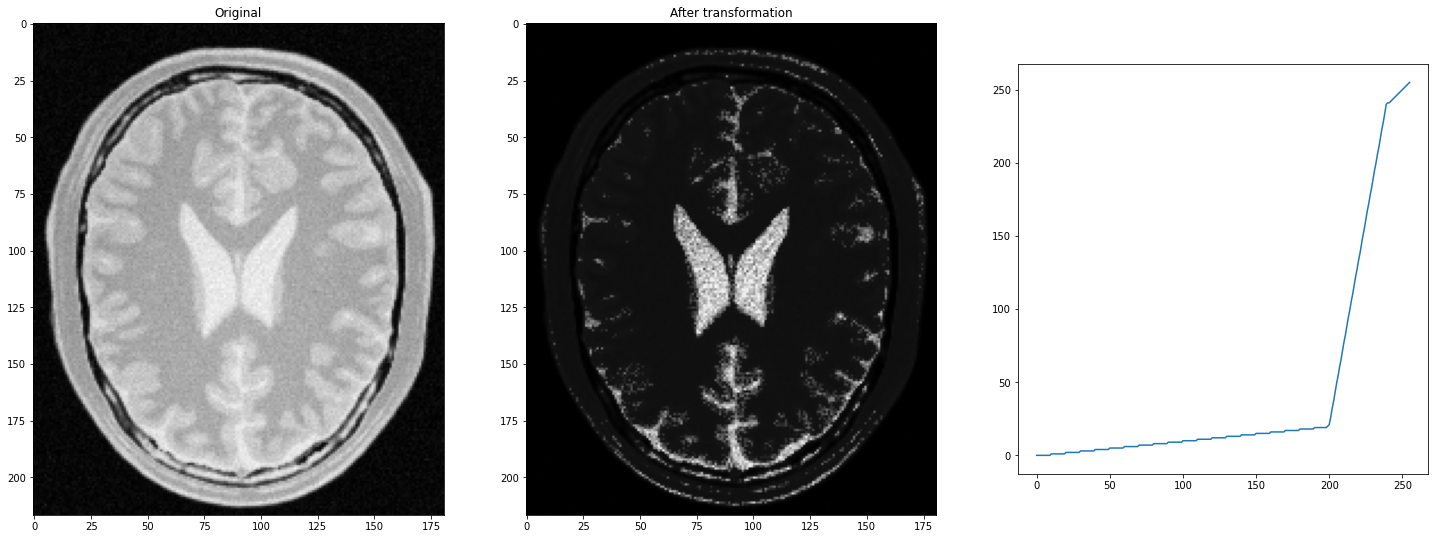

In [13]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Load the brain proton density image
img_orig = cv.imread('images/BrainProtonDensitySlice9.png', cv.IMREAD_GRAYSCALE)

# Create a transformation function
t1 = np.linspace(0, 20, 200).astype('uint8')
t2 = np.linspace(21, 240, 40).astype('uint8')
t3 = np.linspace(241, 255, 16).astype('uint8')
transform = np.concatenate((t1, t2, t3), axis=0).astype('uint8')

# Apply the transformation and display the transformed image
image_transformation = cv.LUT(img_orig, transform)

# Convert the images to RGB for display
image_original = cv.cvtColor(img_orig, cv.COLOR_BGR2RGB)
image_transformed = cv.cvtColor(image_transformation, cv.COLOR_BGR2RGB)


# Plot the original and transformed image
fig, ax = plt.subplots(1,3, figsize = (25,25))
ax[0].imshow(image_original)
ax[1].imshow(image_transformed)
ax[0].set_title('Original')
ax[1].set_title('After transformation')
ax[2].plot(transform)
ax[2].set_aspect('equal')
plt.show()


(b) Gray matter

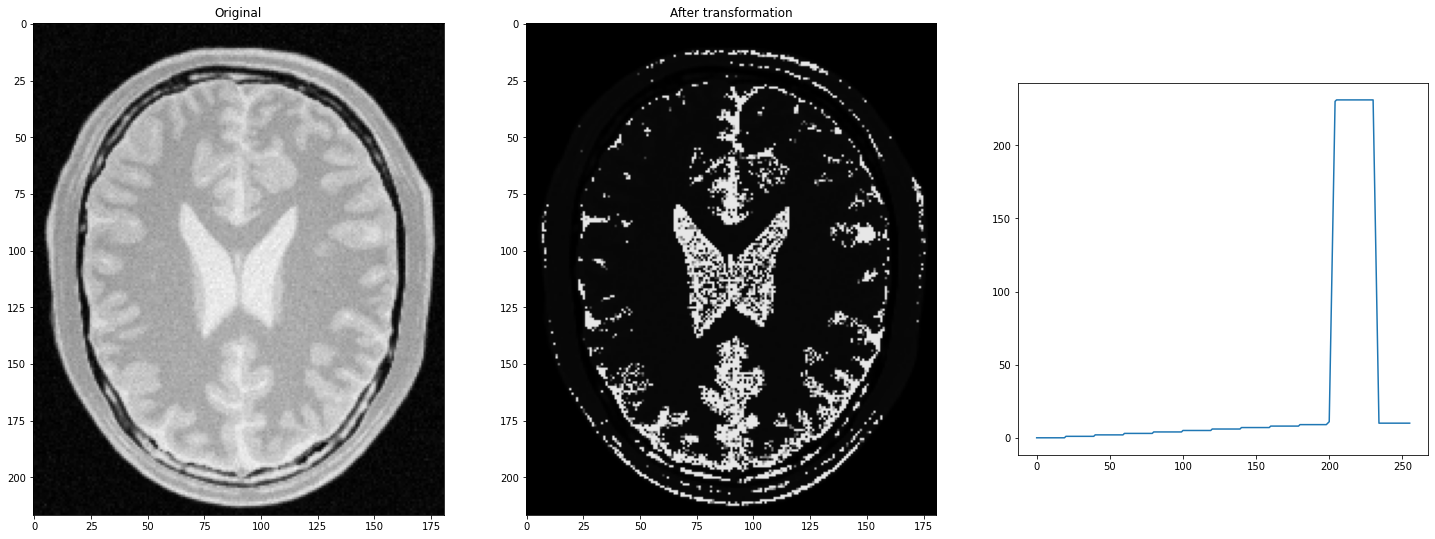

In [14]:


# Create a transformation function
t1 = np.linspace(0,10,200).astype('uint8')
t2 = np.linspace(11,230,5).astype('uint8')
t3 = np.linspace(231,231,25).astype('uint8')
t4 = np.linspace(231,10,5).astype('uint8')
t5 = np.linspace(10,10,21).astype('uint8')
transform = np.concatenate((t1, t2, t3, t4, t5), axis=0).astype('uint8')

# Apply the transformation and display the transformed image
image_transformation = cv.LUT(img_orig, transform)

# Convert the images to RGB for display
image_original = cv.cvtColor(img_orig, cv.COLOR_BGR2RGB)
image_transformed = cv.cvtColor(image_transformation, cv.COLOR_BGR2RGB)


# Plot the original and transformed image
fig, ax = plt.subplots(1,3, figsize = (25,25))
ax[0].imshow(image_original)
ax[1].imshow(image_transformed)
ax[0].set_title('Original')
ax[1].set_title('After transformation')
ax[2].plot(transform)
ax[2].set_aspect('equal')
plt.show()

Question 3

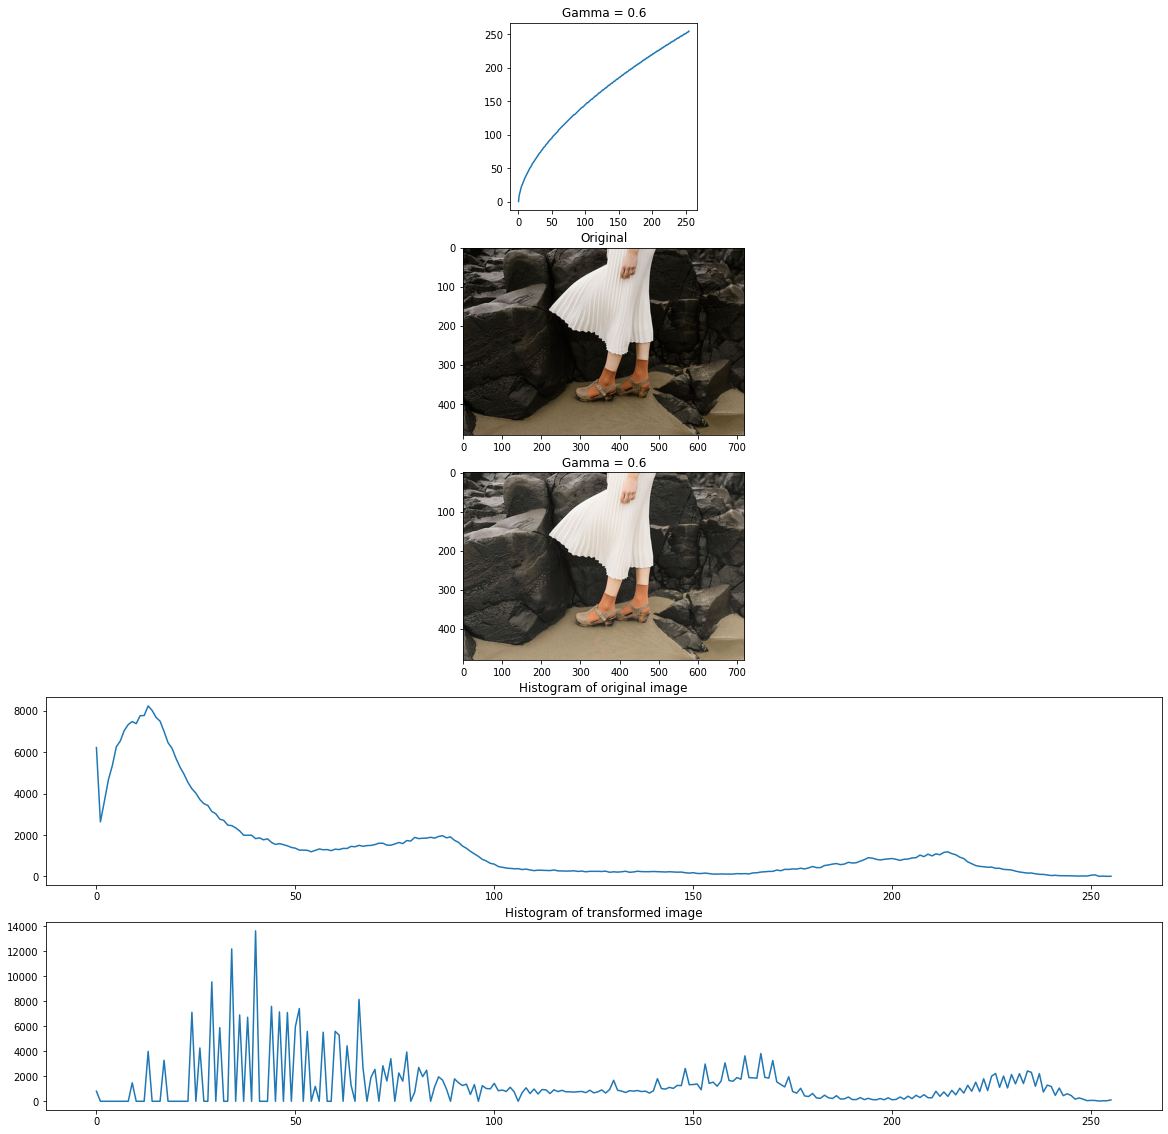

In [34]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

# Load the image
img = cv.imread('images/highlights_and_shadows.jpg', cv.IMREAD_COLOR)
assert img is not None

# Convert the image to LAB
img_trans = cv.cvtColor(img, cv.COLOR_BGR2LAB)

gamma = [0.6]

for k in gamma:
    transform = np.array([(p/255)**k*255 for p in range(0,256)]).astype(np.uint8)
    img_trans[:,:,0]  = cv.LUT(img_trans[:,:,0],transform)
    imgOriginal = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    imgTransformed = cv.cvtColor(img_trans, cv.COLOR_LAB2RGB)

    # Plot the original and transformed image
    fig, ax = plt.subplots(5,1, figsize = (20,20))
    ax[0].plot(transform)
    ax[0].set_title('Gamma = %s'%k)
    ax[0].set_aspect('equal')
    ax[1].imshow(imgOriginal)
    ax[2].imshow(imgTransformed)
    ax[1].set_title('Original')
    ax[2].set_title('Gamma = %s'%k)
    hist_img1 = cv.calcHist([img],[0],None,[256],[0,256])
    hist_img2 = cv.calcHist([img_trans],[0],None,[256],[0,256])
    ax[3].set_title('Histogram of original image')
    ax[3].plot(hist_img1)
    ax[4].set_title('Histogram of transformed image')
    ax[4].plot(hist_img2)

plt.show()


Question 4

Value of 'a' for visually pleasing output: 0.8


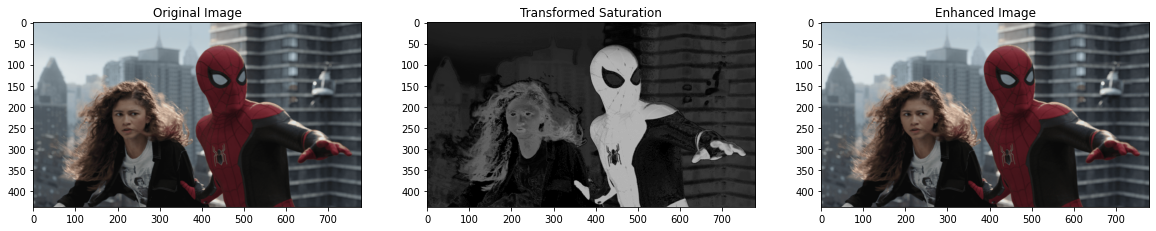

In [50]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

# Load the image
image = cv.imread('images/spider.png', cv.IMREAD_COLOR)
rgb_image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
hsv_image = cv.cvtColor(image, cv.COLOR_BGR2HSV)

# (a) Split the image into hue, saturation, and value planes
hue, saturation, value = cv.split(hsv_image)

# Define the intensity transformation function
def intensity_transformation(x, a, sigma):
    return np.minimum(x + (a / 128) * np.exp(-(x - 128) ** 2 / (2 * sigma ** 2)), 255)

a = 0.8
sigma = 70

# (b) Apply the intensity transformation to the saturation plane
transformed_saturation = intensity_transformation(saturation, a, sigma)

# (c) Report the value of 'a' for visually pleasing output
print("Value of 'a' for visually pleasing output:", a)

# Apply the modified saturation to the hsv image
hsv_image[:, :, 1] = transformed_saturation

# (d) Convert the modified HSV image back to RGB
enhanced_image = cv.cvtColor(hsv_image, cv.COLOR_HSV2RGB)

# (e) Display the original image, enhanced image, and intensity transformation
fig, ax = plt.subplots(1, 3, figsize=(20, 20))
ax[0].imshow(rgb_image)
ax[1].imshow(transformed_saturation, cmap='gray', vmin=0, vmax=255)
ax[2].imshow(enhanced_image)
ax[0].set_title('Original Image')
ax[1].set_title('Transformed Saturation')
ax[2].set_title('Enhanced Image')
plt.show()



Question 5


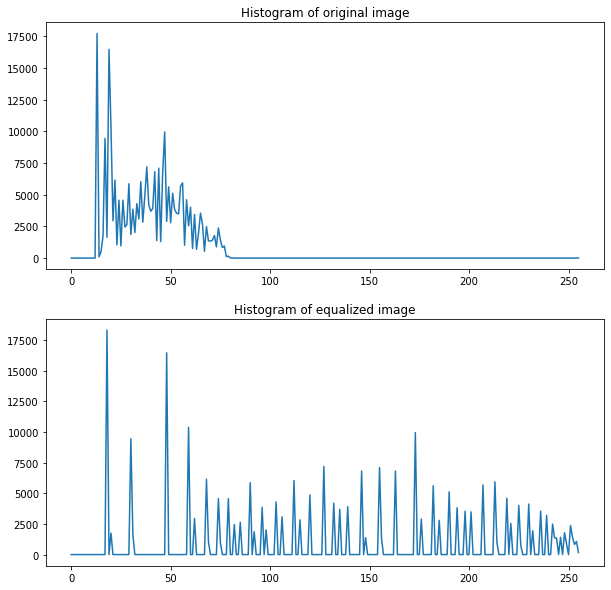

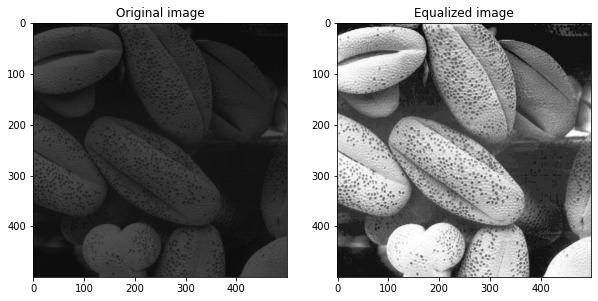

In [3]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plts

# Load the image
img = cv.imread('images/shells.png', cv.IMREAD_GRAYSCALE)
assert img is not None

# Create a transformation function
imgConverted = cv.cvtColor(img, cv.COLOR_BGR2RGB)


fig, ax = plt.subplots(2,1, figsize = (10,10))
hist , bins = np.histogram(img.ravel() , 256 , [0,256])
ax[0].set_title('Histogram of original image')
ax[0].plot(hist)

EqualizeMap = []
sum1 = 0
for i in range(len(bins)-1):
    sum1 += hist[i]
    a = int(round(sum1*255/(img.shape[0]*img.shape[1]),1))
    EqualizeMap.append(a)
    
EqualizedImage = cv.LUT(img,np.array(EqualizeMap).astype(np.uint8))
imgConverted2 = cv.cvtColor(EqualizedImage, cv.COLOR_BGR2RGB)

hist_equalized , bins_equalized = np.histogram(EqualizedImage.ravel() , 256 , [0,256])
ax[1].set_title('Histogram of equalized image')
ax[1].plot(hist_equalized)
fig, ax = plt.subplots(1,2, figsize = (10,10))
ax[0].set_title('Original image')
ax[0].imshow(imgConverted)
ax[1].set_title('Equalized image')
ax[1].imshow(imgConverted2)
plt.show()

Question 6

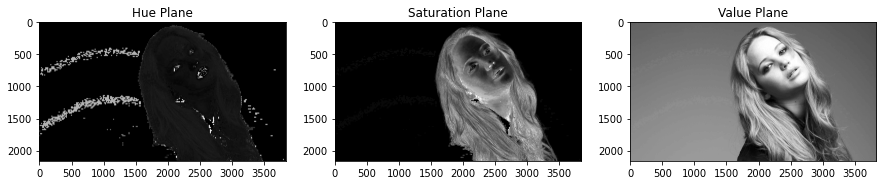

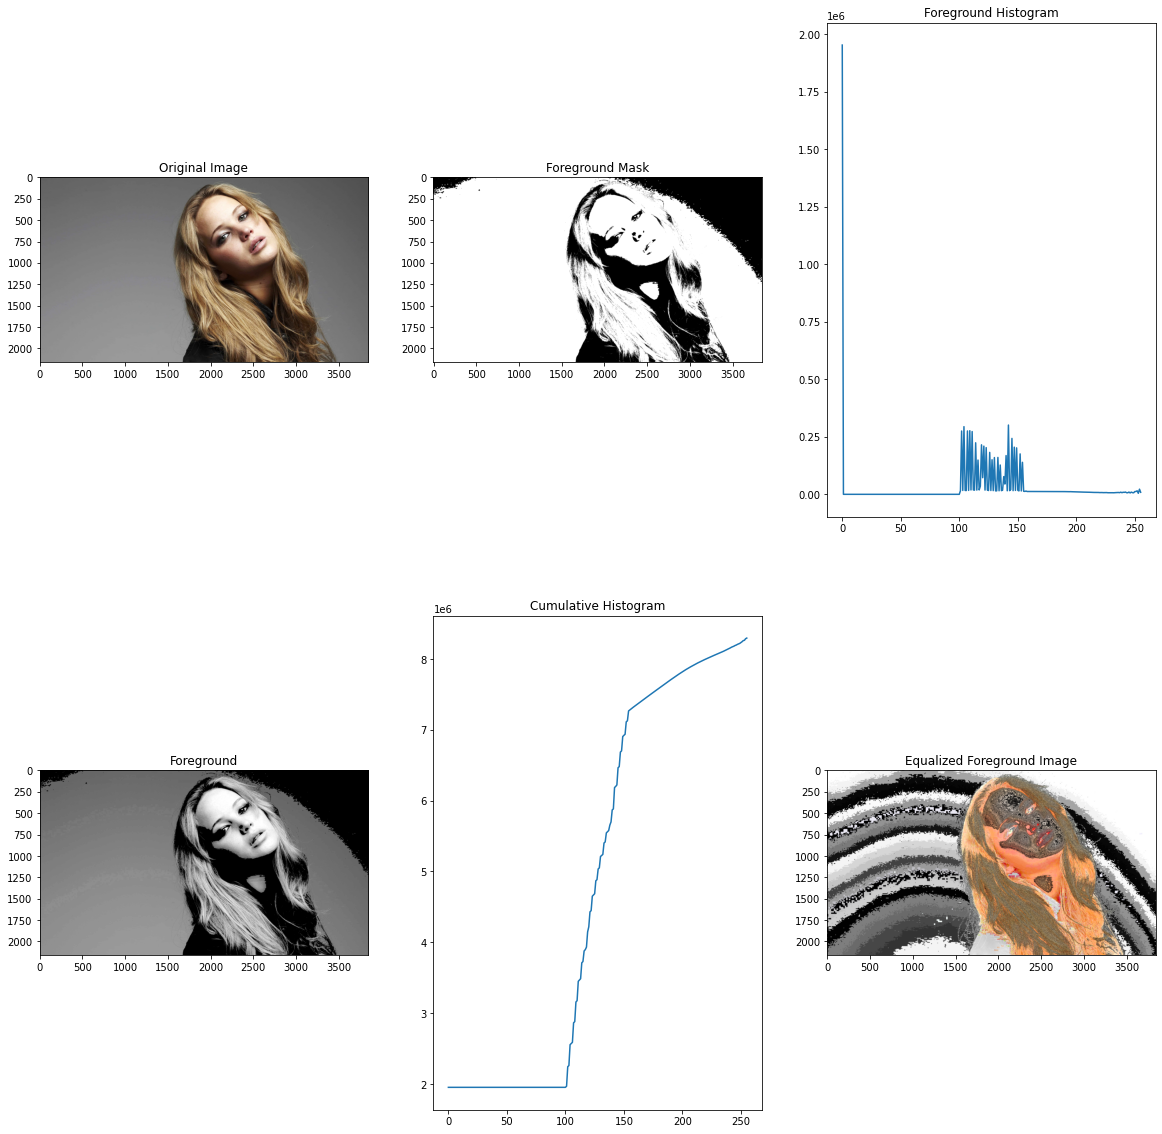

In [62]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv.imread('images/jeniffer.jpg')
rgb_image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
hsv_image = cv.cvtColor(image, cv.COLOR_BGR2HSV)

# (a) Split the image into hue, saturation, and value planes
hue, saturation, value = cv.split(hsv_image)

# Display hue, saturation, and value planes in grayscale
fig, axes = plt.subplots(1, 3, figsize=(15, 15))
axes[0].imshow(hue, cmap='gray')
axes[0].set_title('Hue Plane')
axes[1].imshow(saturation, cmap='gray')
axes[1].set_title('Saturation Plane')
axes[2].imshow(value, cmap='gray')
axes[2].set_title('Value Plane')
plt.show()

# (b) Thresholding to extract the foreground mask
threshold_value = 100  # threshold value
_, foreground_mask = cv.threshold(value, threshold_value, 255, cv.THRESH_BINARY)

# (c) Obtain the foreground only and compute its histogram
foreground = cv.bitwise_and(value, value, mask=foreground_mask)
foreground_histogram = cv.calcHist([foreground], [0], None, [256], [0, 256])

# (d) Obtain the cumulative sum of the histogram
cumulative_histogram = np.cumsum(foreground_histogram)

# (e) Histogram equalization using the cumulative histogram
equalized_foreground = np.interp(foreground, range(256), cumulative_histogram)

# Convert equalized_foreground to the same data type as value
equalized_foreground = equalized_foreground.astype(np.uint8)

# (f) Combine the equalized foreground with the background
equalized_value = cv.add(cv.subtract(value, foreground), equalized_foreground)

# Combine the equalized value plane with the original hue and saturation planes
equalized_hsv_image = cv.merge([hue, saturation, equalized_value])

# Convert back to RGB for display
equalized_RGB_image = cv.cvtColor(equalized_hsv_image, cv.COLOR_HSV2RGB)

# Display the original image, equalized foreground image, and various components
fig, axes = plt.subplots(2, 3, figsize=(20, 20))
axes[0, 0].imshow(rgb_image)
axes[0, 0].set_title('Original Image')
axes[0, 1].imshow(foreground_mask, cmap='gray')
axes[0, 1].set_title('Foreground Mask')
axes[0, 2].plot(foreground_histogram)
axes[0, 2].set_title('Foreground Histogram')
axes[1, 0].imshow(foreground, cmap='gray')
axes[1, 0].set_title('Foreground')
axes[1, 1].plot(cumulative_histogram)
axes[1, 1].set_title('Cumulative Histogram')
axes[1, 2].imshow(equalized_RGB_image)
axes[1, 2].set_title('Equalized Foreground Image')
plt.show()


Question 7

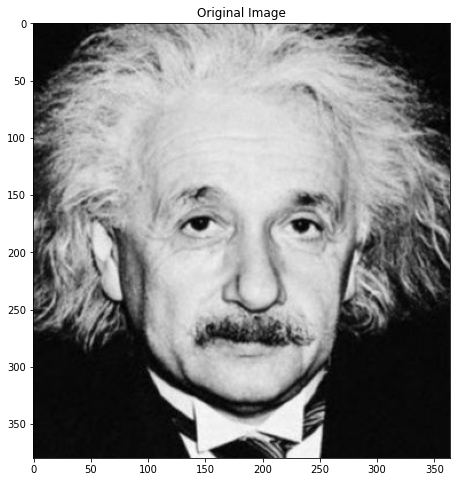

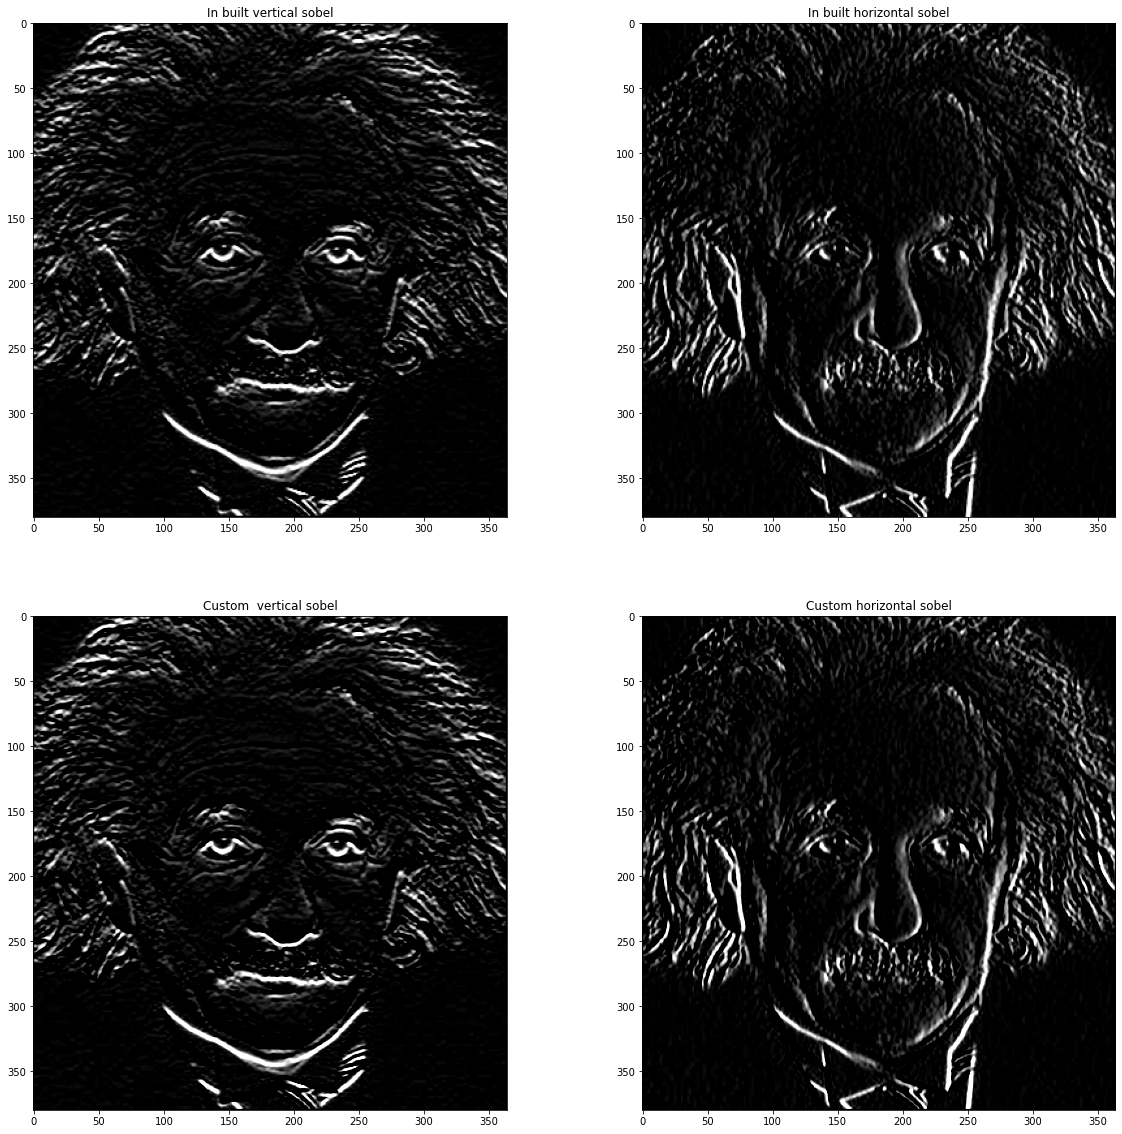

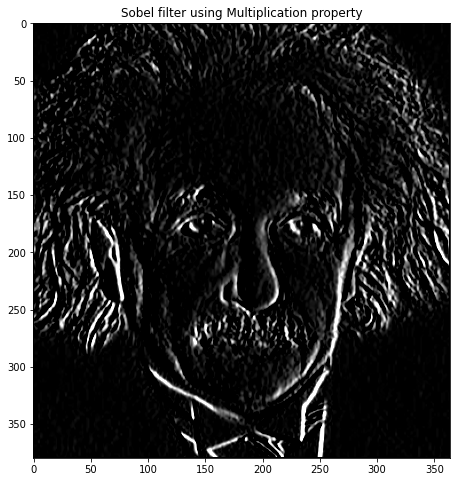

In [34]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

# Load the image
img = cv.imread('images/einstein.png',cv.IMREAD_GRAYSCALE)
imgConverted = cv.cvtColor(img, cv.COLOR_BGR2RGB)
fig , ax = plt.subplots(1,1, figsize = (8,8))
ax.imshow(imgConverted, cmap = 'gray')
ax.set_title('Original Image')


#(a)using inbuilt sobel filter
sobelVertical = np.array([[-1,-2,-1],[0,0,0],[1,2,1]],dtype = np.float32)
sobelHorizontal = np.array([[1,0,-1],[2,0,-2],[1,0,-1]],dtype = np.float32)
imgWithSobelV = cv.filter2D(img,-1,sobelVertical)
imgWithSobelH = cv.filter2D(img,-1,sobelHorizontal)
#############################################################

#(b)Custom Sobel function
def sobel(img, kernal):
    kernal_w = kernal.shape[0]
    kernal_h = kernal.shape[1]
    padsize1 = kernal_w//2
    padsize2 = kernal_h//2

    centerPointx = kernal_w//2 + 1
    centerPointy = kernal_h//2 + 1

    filteredImg = np.zeros((img.shape[0],img.shape[1]), dtype = np.float32)
    for i in range(padsize1,img.shape[0]-padsize1):
        for j in range(padsize2, img.shape[1]-padsize2):
            mat1 = img[i-kernal_w//2:i + kernal_w//2+1, j-kernal_h//2:j + kernal_h//2+1]
            value = sum(sum(mat1 * kernal))
            filteredImg[i,j] = value
    return filteredImg
#############################################################
#Call the custom sobel function
#############################################################
imgCustomSobelV = sobel(img, sobelVertical)
imgCustomSobelH = sobel(img, sobelHorizontal)
#############################################################

#Show the image using inbuilt and custom sobel function
fig, ax1 = plt.subplots(2,2, figsize = (20,20))
ax1[0,0].imshow(imgWithSobelV, cmap = 'gray',vmin = 0,vmax = 255)
ax1[0,0].set_title('In built vertical sobel')
ax1[0,1].imshow(imgWithSobelH, cmap = 'gray',vmin = 0,vmax = 255)
ax1[0,1].set_title('In built horizontal sobel')
ax1[1,0].imshow(imgCustomSobelV, cmap = 'gray',vmin = 0,vmax = 255)
ax1[1,0].set_title('Custom  vertical sobel')
ax1[1,1].imshow(imgCustomSobelH, cmap = 'gray',vmin = 0,vmax = 255)
ax1[1,1].set_title('Custom horizontal sobel')

#(c)Using multiplication property
sobel_1 = np.array([[1],[2],[1]],dtype = np.float32)
sobel_2 = np.array([[1, 0, -1]],dtype = np.float32)
img_1 = sobel(img, sobel_1)
img_2 = sobel(img_1, sobel_2)

#Show the image using multiplication property
fig, ax2 = plt.subplots(1,1, figsize = (8,8))
ax2.imshow(img_2, cmap = 'gray',vmin = 0,vmax = 255)
ax2.set_title('Sobel filter using Multiplication property')
plt.show()

Question 8

SSD of Nearest Neighbour method: 120.33522810570987
SSD of Bilinear method: 118.57803144290123


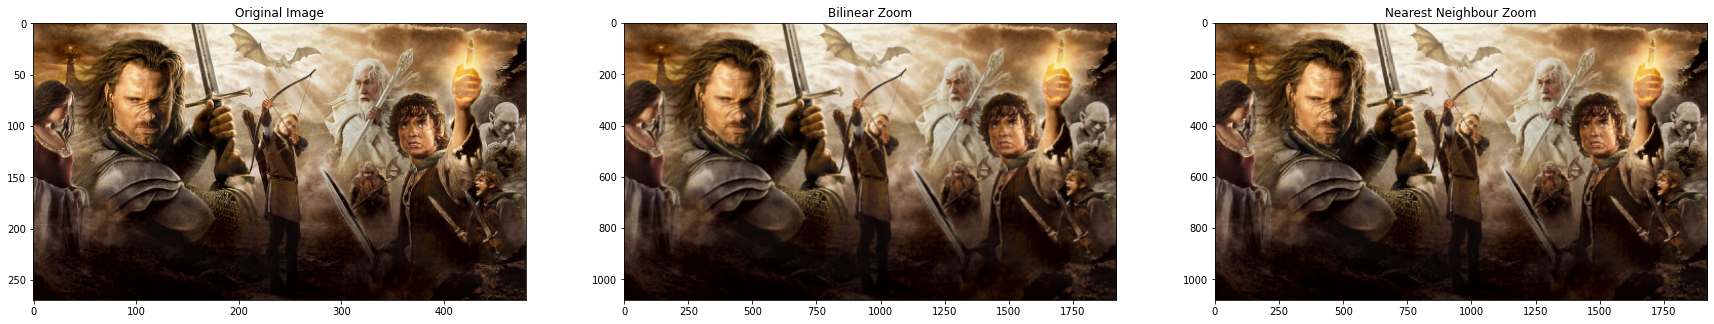

In [19]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

## (a)  Nearest Neighbour
def custom_zoom(img, factor):
    zoomed = np.zeros((int(img.shape[0] * factor), int(img.shape[1] * factor), 3), dtype=img.dtype)
    for i in range(zoomed.shape[0]):
        for j in range(zoomed.shape[1]):
            x = int(round(i / factor, 0))
            y = int(round(j / factor, 0))
            if x >= img.shape[0]:
                x = img.shape[0] - 1
            if y >= img.shape[1]:
                y = img.shape[1] - 1
            zoomed[i, j] = img[x, y]
    return zoomed

## (b) Bilinear Interpolation
def custom_zoom_bilinear(img, factor):
    zoomed = np.zeros((int(img.shape[0] * factor), int(img.shape[1] * factor), 3), dtype=img.dtype)
    for i in range(zoomed.shape[0]):
        for j in range(zoomed.shape[1]):
            x = i / factor
            y = j / factor
            x1 = int(x)
            y1 = int(y)
            x2 = int(x) + 1
            y2 = int(y) + 1
            if x1 >= img.shape[0]:
                x1 = img.shape[0] - 1
            if x2 >= img.shape[0]:
                x2 = img.shape[0] - 1
            if y1 >= img.shape[1]:
                y1 = img.shape[1] - 1
            if y2 >= img.shape[1]:
                y2 = img.shape[1] - 1
            val1 = img[x1, y1] * abs(y - y2) + img[x1, y2] * abs(y - y1)
            val2 = img[x2, y1] * abs(y - y2) + img[x2, y2] * abs(y - y1)
            val3 = val1 * abs(x - x2) + val2 * abs(x - x1)
            for k in range(3):
                val3[k] = int(round(val3[k], 0))
            zoomed[i, j] = val3
    return zoomed

image = cv.imread('zooming/im01small.png')
image_converted = cv.cvtColor(image, cv.COLOR_BGR2RGB)

factor = 4
zoomed_bilinear = custom_zoom_bilinear(image, factor)
zoomed_nearest = custom_zoom(image, factor)

fig, ax = plt.subplots(1, 3, figsize=(30, 30))
ax[0].imshow(image_converted)
ax[0].set_title('Original Image')

image_converted_bilinear = cv.cvtColor(zoomed_bilinear, cv.COLOR_BGR2RGB)
ax[1].imshow(image_converted_bilinear)
ax[1].set_title('Bilinear Zoom')
cv.imwrite("zoomedBilinear.jpg", zoomed_bilinear)

image_converted_nearest = cv.cvtColor(zoomed_nearest, cv.COLOR_BGR2RGB)
ax[2].imshow(image_converted_nearest)
ax[2].set_title('Nearest Neighbour Zoom')
cv.imwrite("zoomed.jpg", zoomed_nearest)

image_original = cv.imread('zooming/im01.png')
ssd_nearest = np.sum((image_original - zoomed_nearest)**2) / (image_original.shape[0] * image_original.shape[1])
print("SSD of Nearest Neighbour method:", ssd_nearest)
print("SSD of Bilinear method:", np.sum((image_original - zoomed_bilinear)**2) / (image_original.shape[0] * image_original.shape[1]))

plt.show()


Question 9

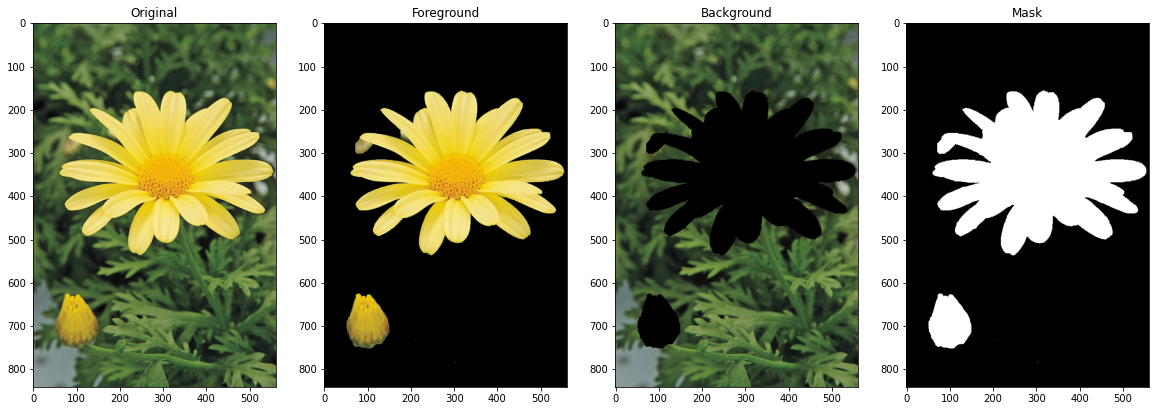

In [22]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

# Load the input image
img = cv.imread('images/daisy.jpg')
imgConverted = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# Create subplots for displaying images
fig, ax = plt.subplots(1, 4, figsize=(20, 20))
ax[0].imshow(imgConverted)
ax[0].set_title('Original')

# Create an initial mask with zeros
mask = np.zeros(img.shape[:2], np.uint8)
background = np.zeros((1, 65), np.float64)
foreground = np.zeros((1, 65), np.float64)

# Define a rectangular region of interest (ROI) for the object
rect = (50, 120, 520, 700)

# Apply GrabCut algorithm to segment the object
cv.grabCut(img, mask, rect, background, foreground, 5, cv.GC_INIT_WITH_RECT)

# Create a binary mask indicating the probable foreground (1) and background (0)
mask2 = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')

# Extract the foreground and create an image with only the object
img_1 = img * mask2[:, :, np.newaxis]
imgConverted2 = cv.cvtColor(img_1, cv.COLOR_BGR2RGB)
ax[1].imshow(imgConverted2)
ax[1].set_title('Foreground')

# Create an image with the background only
img_2 = img - img_1
imgConverted3 = cv.cvtColor(img_2, cv.COLOR_BGR2RGB)
ax[2].imshow(imgConverted3)
ax[2].set_title('Background')

# Display the binary mask
ax[3].imshow(mask2, cmap='gray')
ax[3].set_title('Mask')

# Show the plots
plt.show()


Image Enhancing

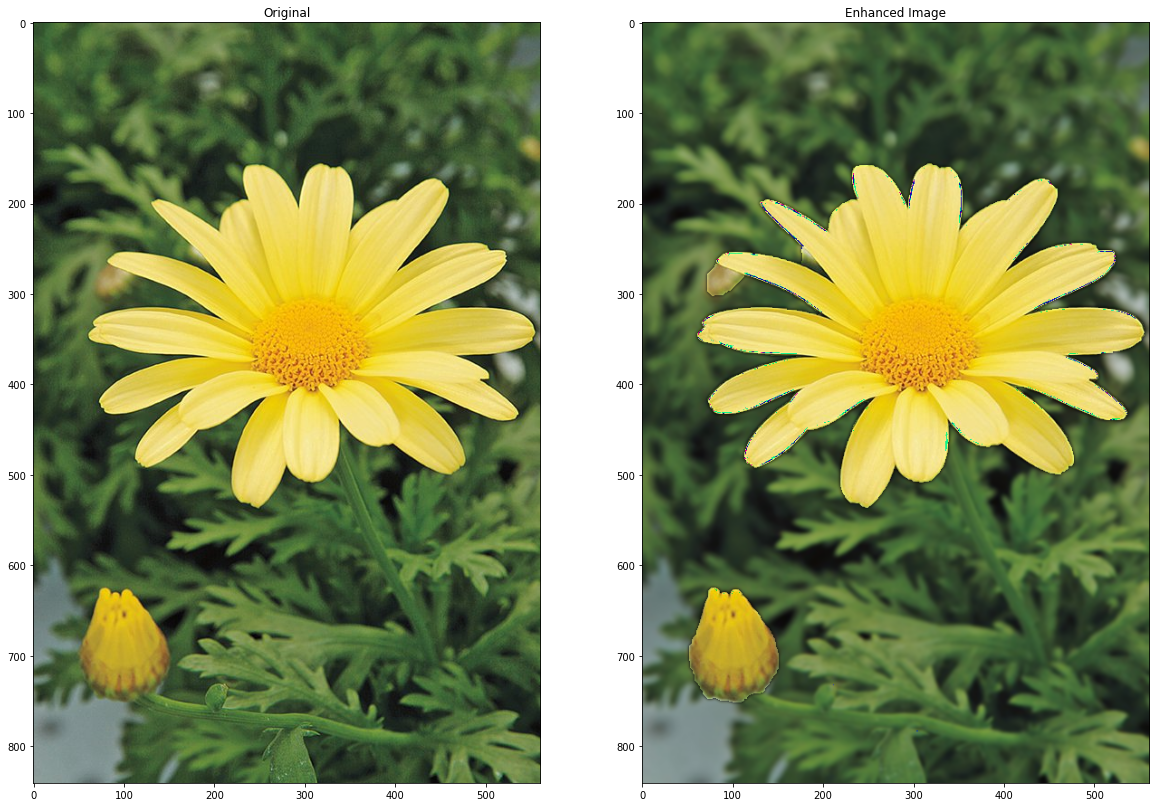

In [23]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

# Load the input image
img = cv.imread('images/daisy.jpg')

# Convert the image from BGR to RGB for display
imgConverted = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# Create subplots for displaying the original and enhanced images
fig, ax = plt.subplots(1, 2, figsize=(20, 20))

# Display the original image
ax[0].imshow(imgConverted)
ax[0].set_title('Original')

# Apply Gaussian blur to the background image
img_3 = cv.GaussianBlur(img_2, (9, 9), 0)

# Combine the original object image and the blurred background image
img_4 = img_1 + img_3

# Convert the combined image from BGR to RGB for display
imgConverted5 = cv.cvtColor(img_4, cv.COLOR_BGR2RGB)

# Display the enhanced image
ax[1].imshow(imgConverted5)
ax[1].set_title('Enhanced Image')

# Show the plots
plt.show()
